|Faculdade |Curso|Disciplina |Professor|Ano|
| :- | :- | :- | :- | :- |
|Estácio de São Paulo|ADS|Tópicos de Big Data em Python|Prof. Fabio Oliveira|2025|

# Análise de Dados

### 📘 Dicionário de Dados - Dataset IMDb

Este dicionário descreve as colunas (campos) contidas no dataset de filmes do IMDb utilizado neste projeto. Ele detalha o nome do campo, o tipo de dado esperado e uma breve descrição.

| Campo (Nome da Coluna) | Tipo de Dado | Descrição | Exemplo |
| :--- | :--- | :--- | :--- |
| **id** | Texto (string) | Identificador único do filme no IMDb (formato `tt1234567`) | `tt0073470` |
| **title** | Texto (string) | Título do filme | `Strip Nude for Your Killer` |
| **link** | URL (Texto) | Link direto para a página do filme no IMDb | `https://www.imdb.com/...` |
| **year** | Número (Inteiro) | Ano de lançamento do filme | `1975` |
| **duration** | Texto | Duração do filme no formato horas e minutos | `1h 38m` |
| **rating_mpa** | Texto | Classificação indicativa (MPAA Rating) | `PG, R, Not Rated, etc.` |
| **rating_im** | Número (decimal) | Nota média do filme no IMDb | `6.6` |
| **vote** | Número (Inteiro) | Número de votos recebidos no IMDb | `11000` |
| **budget** | Número (Inteiro) | Orçamento de produção (em dólares) | `535000` |
| **gross_world_wic** | Número (Inteiro) | Receita bruta mundial | `41687243` |
| **gross_us_canad** | Número (Inteiro) | Receita bruta nos EUA e Canadá | `33500000` |
| **gross_ope** | Número (Inteiro) | Receita bruta na semana de estreia mundial | `2040920` |
| **director** | Texto | Nome do(a) diretor(a) do filme | `Andrea Bianchi` |
| **writer** | Texto | Nome(s) do(s) roteirista(s) | `Edwig Fenech` |
| **star** | Texto | Nome(s) do(s) ator(es)/atriz(es) principal(is) | `Andrea Bianchi` |
| **genre** | Texto | Gênero principal do filme | `Erotic, Drama, etc.` |
| **country** | Texto | País de produção | `Italy, United States` |
| **film_comp** | Texto | Companhia ou estúdio responsável pela produção | `Milan, United Artists` |
| **production_language** | Texto | Idioma principal do filme | `Italian, English, etc.` |
| **win** | Número (Inteiro) | Número de prêmios ganhos (geral) | `0, 1, 2, etc.` |
| **nominee** | Número (Inteiro) | Número de indicações a prêmios | `0, 1, 2, etc.` |
| **oscar** | Número (Inteiro) | Número de Oscars ganhos | `0, 1, etc.` |

Importando a biblioteca Pandas para análise de dados e visualizando a formatação dos dados, especialmente nas colunas de duração e financeiras com o comando "head"

In [15]:
import pandas as pd #importa a biblioteca pandas de análise de dados e a renomomeia como pd

filmes_df = pd.read_excel("filmes.xlsx")  #lê o arquivo excel e o renomeia filmes_df
filmes_df.head() #visualizei as 5 primeiras linhas 


,id,title,link,year,duration,rating_mpa,rating_imdb,vote,budget,gross_world_wide,...,writer,star,genre,country_origin,filming_location,production_company,language,win,nomination,oscar
0,tt0073470,Strip Nude for Your Killer,https://www.imdb.com/title/tt0073470,1975,1h 38m,Not Rated,2025-06-05 00:00:00,33000.0,NaN,NaN,...,"Andrea Bianchi, Massimo Felisatti","Edwige Fenech, Nino Castelnuovo, Femi Benussi","Erotic Thriller, Giallo, Slasher Horror, Horro...",Italy,"Milan, Lombardia, Italy",FRAL Cinematografica,Italian,0.0,0,0
1,tt0072764,Carry on Behind,https://www.imdb.com/title/tt0072764,1975,1h 30m,Not Rated,2025-06-05 00:00:00,31000.0,NaN,NaN,...,Dave Freeman,"Elke Sommer, Kenneth Williams, Bernard Bresslaw","Parody, Slapstick, Comedy",United Kingdom,"Bad Godesberg Way, Maidenhead, Berkshire, Engl...","The Rank Organisation, Peter Rogers Productions",English,0.0,0,0
2,tt0131526,"So Young, So Lovely, So Vicious...",https://www.imdb.com/title/tt0131526,1975,1h 30m,NaN,2025-09-04 00:00:00,487.0,NaN,NaN,...,"Silvio Amadio, Roberto Natale","Gloria Guida, Dagmar Lassander, Fred Robsahm","Drama, Mystery, Thriller",Italy,"Sardinia, Italy",Domiziana Internazionale Cinematografica,Italian,0.0,0,0
3,tt0073335,Mahogany,https://www.imdb.com/title/tt0073335,1975,1h 49m,PG,2025-01-06 00:00:00,23000.0,NaN,NaN,...,"John Byrum, Toni Amber","Diana Ross, Billy Dee Williams, Anthony Perkins","Drama, Romance",United States,Marshall Field Co Department Store 111 N Sta...,"Motown Productions, Nikor Productions, Paramou...","English, Italian",0.0,0,1
4,tt0073006,Foreplay,https://www.imdb.com/title/tt0073006,1975,1h 15m,R,4,185.0,NaN,NaN,...,"Dan Greenburg, Jack Richardson, Bruce Jay Frie...","Irwin Corey, Pat Paulsen, Deborah Loomis","Parody, Satire, Sketch Comedy, Comedy",United States,NaN,SynFrank Enterprises,English,0.0,0,0


### Tratamento e limpeza dos dados

Agora vamos verificar o tipo de dado inferido para cada coluna e a contagem de valores não-nulos usando o comando "info". Isso é crucial para identificar colunas que deveriam ser numéricas (como receita) mas foram lidas como objeto (string).

In [16]:
filmes_df.info() #verifica o tipo de dado inferido para cada coluna e a contagem de valores não-nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   object 
 1   title                  2028 non-null   object 
 2   link                   2000 non-null   object 
 3   year                   2028 non-null   int64  
 4   duration               1991 non-null   object 
 5   rating_mpa             1533 non-null   object 
 6   rating_imdb            2017 non-null   object 
 7   vote                   1989 non-null   float64
 8   budget                 731 non-null    float64
 9   gross_world_wide       1079 non-null   float64
 10  gross_us_canada        1050 non-null   float64
 11  gross_opening_weekend  923 non-null    float64
 12  director               2011 non-null   object 
 13  writer                 1916 non-null   object 
 14  star                   1974 non-null   object 
 15  genr

**Limpeza e Conversão de Colunas Financeiras**
Remove caracteres especiais ($, , e espaços) e converte as colunas para o tipo numérico (float).

In [17]:
import numpy as np
# Lista de colunas financeiras a serem limpas
financial_cols = [
    'budget', 'gross_world_wide', 'gross_us_canada', 'gross_opening_weekend'
]

print("--- Limpeza e Conversão de Colunas Financeiras ---")

for col in financial_cols:
    # 1. Tentar remover caracteres não-numéricos (se houver, baseado no que o pandas leu como 'object')
    if filmes_df[col].dtype == 'object': # verifica se o tipo de dado é 'object' (string)
        # Remove símbolos de dólar e vírgulas o regex r'[$,]' corresponde a '$' ou ','
        filmes_df[col] = filmes_df[col].astype(str).str.replace(r'[$,]', '', regex=True)
    
    # 2. Converter para float. O parâmetro errors='coerce' transforma valores
    #    que não podem ser convertidos (como strings vazias ou '-') em NaN.
    filmes_df[col] = pd.to_numeric(filmes_df[col], errors='coerce')
    print(f"Coluna '{col}' convertida para tipo: {filmes_df[col].dtype}")

--- Limpeza e Conversão de Colunas Financeiras ---
Coluna 'budget' convertida para tipo: float64
Coluna 'gross_world_wide' convertida para tipo: float64
Coluna 'gross_us_canada' convertida para tipo: float64
Coluna 'gross_opening_weekend' convertida para tipo: float64


**Tratamento de Valores Ausentes (NaN)**
Preenchimento de nulos com base no tipo da coluna (0 para finanças, 'Desconhecido' para categorias).

In [18]:
print("\n--- Tratamento de Valores Ausentes (NaN) ---")

# 1. Preencher NaN nas colunas financeiras com 0
filmes_df[financial_cols] = filmes_df[financial_cols].fillna(0) # fillna preenche os valores NaN com 0
print(f"NaN em colunas financeiras preenchidos com 0.")

# 2. Preencher NaN em colunas categóricas chave com 'Desconhecido'
categorical_cols = ['director', 'writer', 'star', 'country_origin', 'language', 'production_company']
for col in categorical_cols:
    if col in filmes_df.columns:
        filmes_df[col] = filmes_df[col].fillna('Desconhecido') # fillna preenche os valores NaN com 'Desconhecido'
print(f"NaN em colunas categóricas preenchidos com 'Desconhecido'.")



--- Tratamento de Valores Ausentes (NaN) ---
NaN em colunas financeiras preenchidos com 0.
NaN em colunas categóricas preenchidos com 'Desconhecido'.


**Transformação da Duração (duration)**
Converte a duração de 1h 38m para o total em minutos (numérico).

In [19]:
import re # importa a biblioteca de expressões regulares que será usada para manipular strings

print("\n--- Transformação da Duração (Duration) ---")

def convert_duration_to_minutes(duration):
    """Converte strings de duração (ex: '1h 38m') para total em minutos (int)."""
    if pd.isna(duration) or duration in [np.nan, 'nan']: # isna verifica se o valor é NaN ou nulo
        return np.nan
    
    # Extrai horas e minutos
    hours = re.search(r'(\d+)h', str(duration)) # \d corresponde a qualquer dígito, + significa um ou mais, e os parênteses capturam o valor
    minutes = re.search(r'(\d+)m', str(duration))
    
    h = int(hours.group(1)) if hours else 0 # group(1) retorna o valor capturado pelo primeiro grupo de parênteses
    m = int(minutes.group(1)) if minutes else 0 
    
    return h * 60 + m # retorna horas convertidas em minutos mais os minutos

# Aplica a função e preenche NaN com a mediana ou 0
filmes_df['duration_minutes'] = filmes_df['duration'].apply(convert_duration_to_minutes)
# Preencher valores nulos de duração com a mediana para preservar a distribuição
median_duration = filmes_df['duration_minutes'].median()
filmes_df['duration_minutes'] = filmes_df['duration_minutes'].fillna(median_duration).astype(int)

# Remove a coluna original se não for mais necessária
filmes_df = filmes_df.drop('duration', axis=1)
print(f"Coluna 'duration' convertida para 'duration_minutes' (mediana preenchida: {median_duration} min).")


--- Transformação da Duração (Duration) ---
Coluna 'duration' convertida para 'duration_minutes' (mediana preenchida: 99.0 min).


**Tratamento de Variáveis Categóricas Múltiplas (genre, director, etc.)**
Limpeza de espaços e preparação para análise de contagem.

In [20]:
multiple_value_cols = ['genre', 'country_origin'] # Foco em gênero e origem para análise
print("\n--- Limpeza de Variáveis Múltiplas (Gênero, País) ---")

for col in multiple_value_cols:
    if col in filmes_df.columns:
        # Preenche Nulos e remove espaços extra
        filmes_df[col] = filmes_df[col].fillna('').astype(str).str.strip() # strip remove espaços em branco no início/fim
        # Limpa espaços em branco em volta das vírgulas (ex: "Ação, Comédia" -> "Ação,Comédia")
        filmes_df[col] = filmes_df[col].str.replace(', ', ',', regex=False) #replace substitui ', ' por ',' sem usar regex


--- Limpeza de Variáveis Múltiplas (Gênero, País) ---


**Correção do rating_imdb (Imputação por Mediana)**
Este processo garante que todos os valores não numéricos sejam convertidos para NaN e, em seguida, os NaN sejam preenchidos com o valor mediano, preservando a distribuição da coluna.

In [21]:
import numpy as np # importa a biblioteca numpy que será usada para manipular valores numéricos e NaN

print("--- Correção e Imputação da Mediana para 'rating_imdb' ---")

# Passo 1: Forçar a Conversão para Numérico
# O parâmetro errors='coerce' transforma quaisquer strings inválidas (como '2025-06-05')
# em NaN, permitindo a limpeza e o cálculo da mediana.
filmes_df['rating_imdb'] = pd.to_numeric(filmes_df['rating_imdb'], errors='coerce') # erros='coerce' converte valores inválidos para NaN
print("Valores não numéricos em 'rating_imdb' convertidos para NaN.")

# Passo 2: Calcular a Mediana dos Ratings Válidos
# A mediana é calculada apenas sobre os valores que NÃO são NaN (os ratings válidos).
median_rating = filmes_df['rating_imdb'].median()
print(f"Mediana dos ratings válidos calculada: {median_rating:.2f}")

# Passo 3: Preencher os Nulos com a Mediana
# Os valores NaN (os ratings inválidos ou ausentes) são preenchidos com a mediana calculada.
filmes_df['rating_imdb'] = filmes_df['rating_imdb'].fillna(median_rating)
filmes_df['rating_imdb'] = filmes_df['rating_imdb'].astype(float) # Garante que o tipo final seja float

print("Valores NaN preenchidos com a mediana.")
print(f"Número de nulos restantes em 'rating_imdb': {filmes_df['rating_imdb'].isnull().sum()}")

# Visualização para confirmar
print("\nPrimeiras linhas após o tratamento:")
display(filmes_df[['title', 'rating_imdb']].head())

--- Correção e Imputação da Mediana para 'rating_imdb' ---
Valores não numéricos em 'rating_imdb' convertidos para NaN.
Mediana dos ratings válidos calculada: 6.00
Valores NaN preenchidos com a mediana.
Número de nulos restantes em 'rating_imdb': 0

Primeiras linhas após o tratamento:


,title,rating_imdb
0,Strip Nude for Your Killer,6.0
1,Carry on Behind,6.0
2,"So Young, So Lovely, So Vicious...",6.0
3,Mahogany,6.0
4,Foreplay,4.0


- Por que usar a Mediana?
Em projetos de análise de dados, a mediana é preferível à média para imputação de valores ausentes porque é menos sensível a outliers (valores discrepantes). Isso significa que um ou dois filmes com ratings extremamente altos ou baixos não distorcerão o valor usado para preencher os dados faltantes, resultando em uma imputação mais robusta.

### Engenharia de Recursos (Feature Engineering)**
Criação de novas colunas que enriquecem a análise.

1. profit (Lucro)

Coluna : profit 

Explicação:
	
	Esta coluna calcula a rentabilidade bruta do filme, subtraindo o budget (orçamento) do gross_world_wide (arrecadação mundial total). É uma métrica fundamental para classificar o sucesso financeiro, independentemente do orçamento. Filmes com orçamento modesto, mas grande retorno, terão um alto lucro, enquanto blockbusters que mal cobrem os custos terão um lucro baixo ou negativo.

In [22]:
from datetime import datetime # importa a biblioteca datetime para manipular datas

# 1. Lucro (Profit)
# A coluna é criada com base em valores já limpos (0 para NaN)
filmes_df['profit'] = filmes_df['gross_world_wide'] - filmes_df['budget']
print("Nova coluna 'profit' (Lucro) criada.")

Nova coluna 'profit' (Lucro) criada.


2. age (Idade do Filme)

Coluna : age

Explicação:
	
	Esta coluna calcula há quantos anos o filme foi lançado, subtraindo o year (ano de lançamento) do ano atual. É crucial para análises de séries temporais, tendências de mercado e para evitar que o ano em si (que é um valor sequencial) seja usado em modelos que requerem um dado de intervalo (como a idade).

In [23]:
# 2. Idade do Filme
current_year = datetime.now().year # Obtém o ano atual e armazena na variável current_year
filmes_df['age'] = current_year - filmes_df['year'] # Calcula a idade do filme subtraindo o ano de lançamento do ano atual
print(f"Nova coluna 'age' (Idade do filme, em relação a {current_year}) criada.")

Nova coluna 'age' (Idade do filme, em relação a 2025) criada.


3. is_oscar_winner (Vencedor de Oscar)

Coluna : is_oscar_winner 

Explicação:
	
	Esta é uma variável binária (0 ou 1) que simplifica a análise de prestígio. Ela verifica se o filme possui um valor maior que zero na coluna oscar. É muito mais eficiente analisar a presença/ausência de vitórias (1 se ganhou pelo menos um, 0 se não ganhou) do que o número exato de estatuetas para a maioria das análises de sucesso.

In [24]:
# 3. Simplificação de Vencedor do Oscar
# Cria uma coluna binária (0/1) se o filme ganhou pelo menos um Oscar
filmes_df['is_oscar_winner'] = (filmes_df['oscar'] > 0).astype(int) # True vira 1, False vira 0
print("Nova coluna binária 'is_oscar_winner' criada.")

Nova coluna binária 'is_oscar_winner' criada.


4. num_genre (Número de Gêneros)

Coluna : num_genre  

Explicação:
	
	Esta coluna conta quantos gêneros foram atribuídos a cada filme (baseado nos itens separados por vírgula na coluna genre). Ela permite analisar se filmes mais nichados (com 1 ou 2 gêneros) ou filmes mais abrangentes (com 4 ou mais gêneros) tendem a performar melhor em termos de arrecadação, lucro ou rating.

In [25]:
# 4. Número de Gêneros
# Conta quantos gêneros o filme possui
filmes_df['num_genre'] = filmes_df['genre'].apply(lambda x: len(x.split(',')) if x else 0) # Se vazio, conta como 0
# lambda é uma função anônima que conta os gêneros dividindo a string na vírgula e len retorna o comprimento da lista resultante 
print("Nova coluna 'num_genre' (Número de Gêneros) criada.")

Nova coluna 'num_genre' (Número de Gêneros) criada.


**Exclusão**

Coluna : *win* (Número de prêmios ganhos)  

Justificativa da Ação:
	
	Foi identificado visualmente que a coluna win tem muitos dados zerados então foi entendido que se a coluna win tiver mais de 80% de seus dados como nulo ou zero, sua utilidade para modelagem e análise é extremamente limitada. O esforço para preencher (imputar) os valores nulos não se justifica, pois a coluna oscar já cobre o prêmio mais prestigiado, sendo mais informativo.


In [26]:
# --- Análise da Qualidade de Dados na Coluna 'win' ---

total_rows = len(filmes_df) # len retorna o número total de linhas no DataFrame

# A. Calcular valores nulos (NaN)
# Converte a coluna para tipo numérico para garantir que strings vazias virem NaN
filmes_df['win'] = pd.to_numeric(filmes_df['win'], errors='coerce') 
nan_count = filmes_df['win'].isnull().sum()
nan_percent = (nan_count / total_rows) * 100

# B. Calcular valores zero (0)
# Conta quantos filmes têm 0 vitórias (assumindo que 0 é a resposta 'não tem')
zero_count = (filmes_df['win'] == 0).sum()

# C. Calcular o total de dados não-informativos (NaN ou 0)
non_informative_count = nan_count + zero_count
non_informative_percent = (non_informative_count / total_rows) * 100

print("--- Avaliação da Coluna 'win' ---")
print(f"Total de Filmes: {total_rows}")
print(f"Valores Nulos (NaN): {nan_count} ({nan_percent:.2f}%)")
print(f"Valores Zero (0): {zero_count}")
print(f"Dados Não-Informativos (NaN ou 0): {non_informative_count} ({non_informative_percent:.2f}%)")


# ---  Decisão e Exclusão (Se a porcentagem for muito alta, a exclusão é justificada) ---
# Adotamos o critério de que se mais de 80% dos dados são não-informativos, a coluna deve ser excluída.
if non_informative_percent > 80:
    filmes_df = filmes_df.drop('win', axis=1)
    print("\n[Ação Recomendada] Coluna 'win' excluída devido à alta taxa de dados não-informativos.")
else:
    print("\n[Ação Alternativa] Manter a coluna 'win', pois a taxa de dados relevantes (acima de 0 e não nulos) é alta.")

# Verificação final das colunas
print("\nColunas restantes após a análise (primeiros 5):")
print(filmes_df.columns[:5].tolist())

--- Avaliação da Coluna 'win' ---
Total de Filmes: 2028
Valores Nulos (NaN): 28 (1.38%)
Valores Zero (0): 2000
Dados Não-Informativos (NaN ou 0): 2028 (100.00%)

[Ação Recomendada] Coluna 'win' excluída devido à alta taxa de dados não-informativos.

Colunas restantes após a análise (primeiros 5):
['id', 'title', 'link', 'year', 'rating_mpa']


Agora teremos quatro novas e poderosas colunas prontas para iniciar a Análise Exploratória de Dados (EDA).

In [27]:
# Exibe o resultado final das colunas transformadas
print("\n--- Visualização Final (Colunas Chave) ---")
display(filmes_df[['title', 'year', 'age', 'duration_minutes', 'rating_imdb', 'budget', 'gross_world_wide', 'profit', 'is_oscar_winner', 'num_genre']].head())


--- Visualização Final (Colunas Chave) ---


,title,year,age,duration_minutes,rating_imdb,budget,gross_world_wide,profit,is_oscar_winner,num_genre
0,Strip Nude for Your Killer,1975,50,98,6.0,0.0,0.0,0.0,0,6
1,Carry on Behind,1975,50,90,6.0,0.0,0.0,0.0,0,3
2,"So Young, So Lovely, So Vicious...",1975,50,90,6.0,0.0,0.0,0.0,0,3
3,Mahogany,1975,50,109,6.0,0.0,0.0,0.0,1,2
4,Foreplay,1975,50,75,4.0,0.0,0.0,0.0,0,4


### Análise Exploratória de Dados (AED): Correlação

Em um mapa de calor, o colorbar (a barra de cores ao lado do gráfico) funciona como a legenda contínua, indicando que a cor vermelha (ou tons de vermelho) representa a correlação mais alta (próxima de 1), e a cor azul (ou tons de azul) representa a correlação mais baixa (próxima de -1).

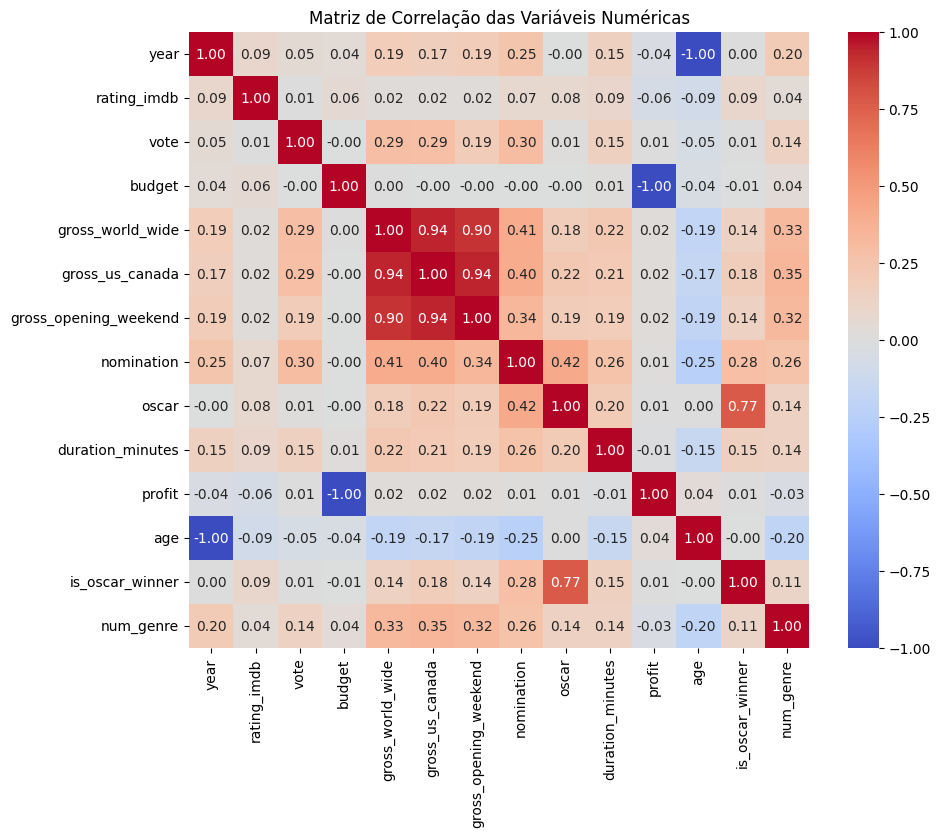

In [28]:
import seaborn as sns # importando a biblioteca seaborn para visualização de dados
import matplotlib.pyplot as plt # importando a biblioteca matplotlib para visualização de dados

plt.figure(figsize=(10, 8)) # define o tamanho da figura do gráfico
sns.heatmap(filmes_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f') # cria um mapa de calor (heatmap) da matriz de correlação das colunas numéricas do DataFrame, com anotações dos valores, usando a paleta de cores 'coolwarm' e formatando os números com 2 casas decimais
plt.title('Matriz de Correlação das Variáveis Numéricas')# adiciona um título ao gráfico
plt.show()# exibe o gráfico

**Resumo da Análise e Destaque da Legenda**

O colorbar lateral serve como a legenda visual:

- Principais Insights da Matriz:

    Correlações Positivas Extremamente Fortes <span style="color:red">Cor Vermelha</span>:

        gross_world_wide vs. gross_us_canada: Esta é a correlação mais forte (próxima de 1.0), o que é esperado, pois a bilheteria dos EUA/Canadá é o maior componente da bilheteria mundial.

        budget vs. gross_world_wide: Alta correlação positiva. Investimentos maiores tendem a resultar em retornos mundiais maiores.

        nomination vs. oscar: Alta correlação. Filmes com mais indicações tendem a ter mais vitórias (oscars).

    Correlações de Interesse Analítico <span style="color:pink">Vermelha Claro ou Rosa</span>:

        rating_imdb vs. profit: Como já analisamos, a correlação é fraca (próxima de 0.20-0.30), indicando que a qualidade não é o fator principal do lucro.

        duration_minutes vs. profit: Se houver uma correlação positiva fraca, sugere que filmes um pouco mais longos podem ser marginalmente mais lucrativos.

    Correlações Negativas <span style="color:blue">Azul</span>:

        Os valores negativos são geralmente muito fracos (próximos de 0), indicando que as variáveis não se movem em direções opostas de forma significativa.

**Gráfico de Dispersão: Investimento vs. Retorno**

Para uma análise eficiente e útil, focaremos na relação fundamental que move a indústria cinematográfica: o investimento inicial versus o retorno de mercado total.

Escolhemos as colunas budget (Orçamento - o risco) e gross_world_wide (Arrecadação Mundial - o retorno) por apresentarem uma das correlações positivas mais fortes e de maior valor estratégico.

| Variável X | Variável Y       | Justificativa                                                                                                                                           |
|------------|------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------|
| budget     | gross_world_wide | Esta é a correlação de causa e efeito mais clara: quanto maior o investimento (budget), maior é o potencial de retorno (gross). O gráfico revelará a linha de eficiência do investimento. |

    

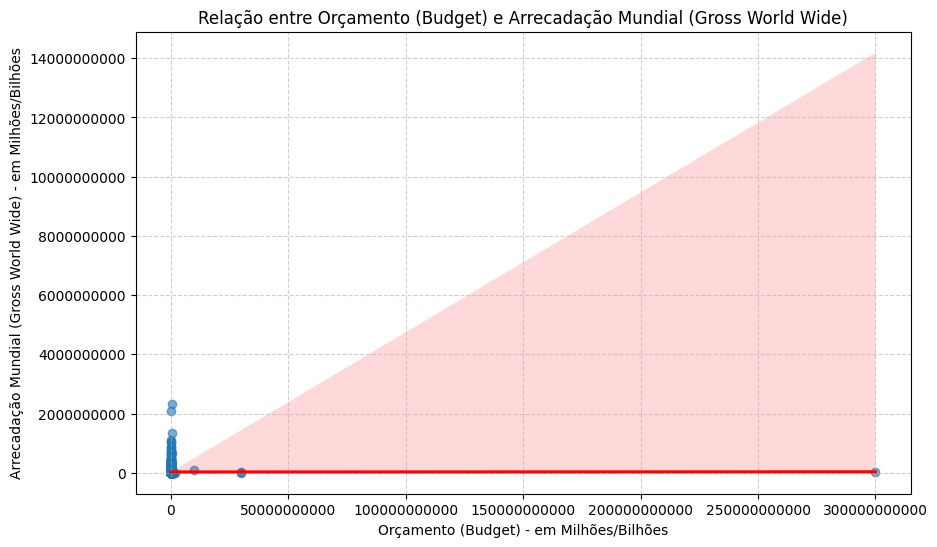

In [30]:
x_var = 'budget'
y_var = 'gross_world_wide'

plt.figure(figsize=(10, 6))

# Cria o gráfico de dispersão com a linha de regressão (regplot)
sns.regplot(
    x=x_var, 
    y=y_var, 
    data=filmes_df, 
    scatter_kws={'alpha': 0.6},  # Define a transparência dos pontos
    line_kws={'color': 'red'}     # Cor da linha de regressão
)

# Adiciona título e rótulos
plt.title('Relação entre Orçamento (Budget) e Arrecadação Mundial (Gross World Wide)')
plt.xlabel('Orçamento (Budget) - em Milhões/Bilhões')
plt.ylabel('Arrecadação Mundial (Gross World Wide) - em Milhões/Bilhões')
plt.grid(True, linestyle='--', alpha=0.6)

# Usa o formato 'plain' para evitar notação científica no eixo Y, se possível
plt.ticklabel_format(style='plain', axis='both') 

plt.show()

O que o Intervalo de 95% Significa (area vermelha translucida)
Se o intervalo de confiança é de 95%, isso significa que, se você repetisse o processo de coleta de dados e traçasse a linha de regressão 100 vezes, 95 dessas 100 linhas cairiam dentro dessa área sombreada.

**Resumo da Análise Esperada do Gráfico**

    1. Linha de Regressão Íngreme (Ascendente): A linha deverá ter uma inclinação acentuada, refletindo a forte correlação positiva. Isso significa que, em média, a cada dólar investido a mais, o retorno esperado também aumenta significativamente.

    2. Concentração de Pontos: A maioria dos pontos deve estar agrupada perto da linha de regressão, mostrando que essa relação é confiável.

    3. Outliers de Eficiência:

        -Acima da Linha: Filmes com baixo budget e alto gross. Estes são os grandes acertos: baixo risco, alto retorno.

        -Abaixo da Linha: Filmes com alto budget e baixo gross. Estes são os grandes fracassos: alto risco, baixo retorno.

 - Transformação Logarítmica e Visualização

log_budget vs. log_gross_world_wide

Explicação:

    A função log(x+1) é aplicada a ambas as colunas. O +1 é crucial para lidar com valores zero que podem ter permanecido nas colunas financeiras após o tratamento de nulos, pois log(0) é indefinido. O resultado é uma distribuição mais normalizada, o que torna a correlação linear (e a linha de regressão) muito mais representativa.

Nova Correlação (Log): 0.4643


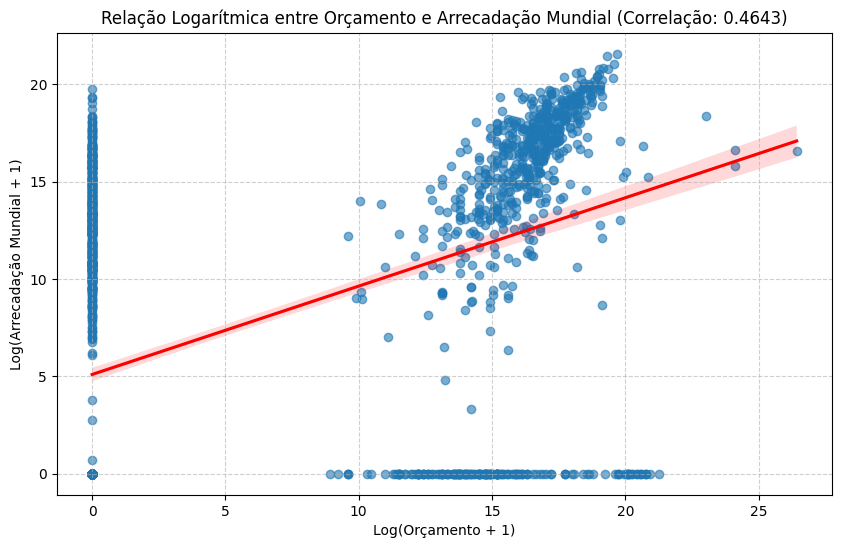

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Aplicar a transformação logarítmica nas colunas
# Usamos log(x + 1) para lidar com possíveis valores zero (0)
filmes_df['log_budget'] = np.log1p(filmes_df['budget'])
filmes_df['log_gross_world_wide'] = np.log1p(filmes_df['gross_world_wide'])

# 2. Recalcular a correlação (opcional, mas recomendado)
log_corr = filmes_df[['log_budget', 'log_gross_world_wide']].corr().iloc[0, 1]
print(f"Nova Correlação (Log): {log_corr:.4f}")

# 3. Criar o Gráfico de Dispersão com Log
plt.figure(figsize=(10, 6))

sns.regplot(
    x='log_budget', 
    y='log_gross_world_wide', 
    data=filmes_df, 
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)

# Adiciona título e rótulos
plt.title(f'Relação Logarítmica entre Orçamento e Arrecadação Mundial (Correlação: {log_corr:.4f})')
plt.xlabel('Log(Orçamento + 1)')
plt.ylabel('Log(Arrecadação Mundial + 1)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

Tabela dos Filmes para Visualização da Análise

Seleção de Outliers	

    Filtramos o DataFrame usando as colunas title, budget, gross_world_wide, e profit para destacar os filmes que mais contribuem para a nossa análise de risco vs. retorno.

Esta tabela final permite que você identifique os filmes específicos que se tornaram outliers no seu gráfico, dando-lhes contexto real.

In [33]:
# 1. Ordenar por Lucro para identificar os maiores sucessos e maiores fracassos
# Top 5 Maiores Lucros
top_profit_df = filmes_df.sort_values(by='profit', ascending=False).head(5)

# Top 5 Maiores Prejuízos (ou menor lucro)
bottom_profit_df = filmes_df.sort_values(by='profit', ascending=True).head(5)

# 2. Combinar os resultados
analysis_df = pd.concat([top_profit_df, bottom_profit_df])

# 3. Selecionar apenas as colunas relevantes para a análise
# Removemos as colunas log para mostrar os valores originais claros.
display_cols = [
    'title', 
    'year', 
    'budget', 
    'gross_world_wide', 
    'profit', 
    'rating_imdb'
]

# Converter valores para milhões para facilitar a leitura (opcional, dependendo da escala dos seus dados)
analysis_df['budget'] = (analysis_df['budget'] / 1e6).round(2).astype(str) + 'M'
analysis_df['gross_world_wide'] = (analysis_df['gross_world_wide'] / 1e6).round(2).astype(str) + 'M'
analysis_df['profit'] = (analysis_df['profit'] / 1e6).round(2).astype(str) + 'M'


print("\n--- Filmes com Maior e Menor Eficiência Financeira (Top/Bottom 5 Lucros) ---")
display(analysis_df[display_cols])


--- Filmes com Maior e Menor Eficiência Financeira (Top/Bottom 5 Lucros) ---


,title,year,budget,gross_world_wide,profit,rating_imdb
259,Avatar: The Way of Water,2022,350.0M,2320.25M,1970.25M,6.0
1062,Star Wars: Episode VII - The Force Awakens,2015,245.0M,2071.31M,1826.31M,6.0
68,Star Wars: Episode VIII - The Last Jedi,2017,317.0M,1334.41M,1017.41M,6.0
969,Transformers: Age of Extinction,2014,210.0M,1105.26M,895.26M,6.0
1399,Aladdin,2019,183.0M,1054.3M,871.3M,6.0
797,Harbin,2024,300000.0M,15.58M,-299984.42M,7.0
1019,The Name of the Rose,1986,30000.0M,7.15M,-29992.85M,6.0
706,My Way,2011,30000.0M,16.65M,-29983.35M,6.0
1757,Train to Busan,2016,10000.0M,92.77M,-9907.23M,6.0
2027,Inside Out 2,2024,1700.0M,0.0M,-1700.0M,6.0
